In [10]:
import pickle
import pandas as pd
import seaborn as sns

In [11]:
pickle_in = open("LSTM_CodeForces","rb")
multilabel_list_object,LSTM_classes_tags,list_of_LSTM_recall ,list_of_LSTM_precision,list_of_LSTM_f1_score,list_of_LSTM_roc_auc,y_actual,y_predicted = pickle.load(pickle_in)

In [12]:
pickle_in = open("Linear_SVC_Codeforces","rb")
multilabel_list_object,SVC_classes_tags,list_of_linear_Recall,list_of_linear_precision,list_of_linear_f1_score,list_of_linear_roc_auc,y_actual,y_predicted = pickle.load(pickle_in)

In [13]:
print(SVC_classes_tags)
print(len(list_of_linear_Recall))
print(list_of_linear_Recall[2])

['*special' '2-sat' 'binary search' 'bitmasks' 'brute force'
 'chinese remainder theorem' 'combinatorics' 'constructive algorithms'
 'data structures' 'dfs and similar' 'divide and conquer' 'dp' 'dsu'
 'expression parsing' 'fft' 'flows' 'games' 'geometry' 'graph matchings'
 'graphs' 'greedy' 'hashing' 'implementation' 'math' 'matrices'
 'meet-in-the-middle' 'number theory' 'probabilities' 'schedules'
 'shortest paths' 'sortings' 'string suffix structures' 'strings'
 'ternary search' 'trees' 'two pointers']
36
0.8015170670037927


In [14]:
print(LSTM_classes_tags)
print(len(list_of_LSTM_recall))
print(list_of_LSTM_recall[2])

['*special' '2-sat' 'binary search' 'bitmasks' 'brute force'
 'chinese remainder theorem' 'combinatorics' 'constructive algorithms'
 'data structures' 'dfs and similar' 'divide and conquer' 'dp' 'dsu'
 'expression parsing' 'fft' 'flows' 'games' 'geometry' 'graph matchings'
 'graphs' 'greedy' 'hashing' 'implementation' 'math' 'matrices'
 'meet-in-the-middle' 'number theory' 'probabilities' 'schedules'
 'shortest paths' 'sortings' 'string suffix structures' 'strings'
 'ternary search' 'trees' 'two pointers']
36
0.44374209860935526


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def Visualization_Individual(Y_axis_data,list_of_Data,title,label_Name,x_label_Name,y_label_name):
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 15))

    # Load the example car crash dataset
    # crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

#     list_both = [list_of_linear_Recall,list_of_LSTM_recall]

    crashes = pd.DataFrame({'Y_Axis':Y_axis_data,
                       title:list_of_Data
                       ,'LSTM':list_of_LSTM_recall
    #                    ,'Algo':list_both
                      })


    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x=title, y="Y_Axis", data=crashes,
                label=label_Name, color="b")

    # # Plot the crashes where alcohol was involved
    # sns.set_color_codes("muted")
    # sns.barplot(x="LSTM", y="Y_Axis", data=crashes,
    #             label="LSTM", color="y")

    # Add a legend and informative axis label
    ax.legend(ncol=3, loc="lower right", frameon=True)
    ax.set(xlim=(0, 1), ylabel=y_label_name,
           xlabel=x_label_Name)
    sns.despine(left=True, bottom=True)
    


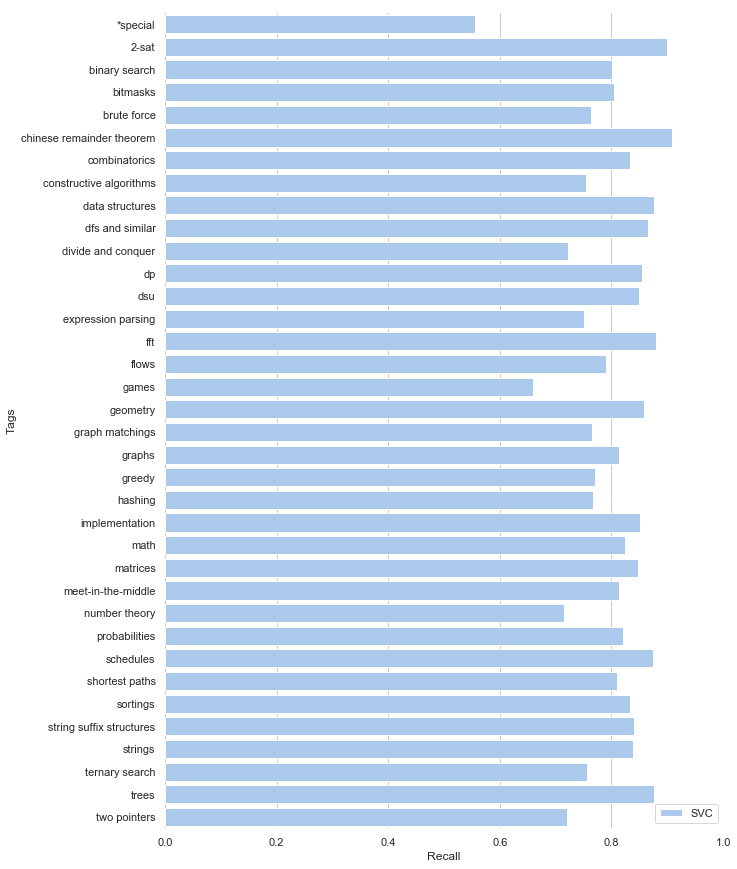

In [16]:
Visualization_Individual(SVC_classes_tags,list_of_linear_Recall,"Linear_SVC","SVC","Recall","Tags")

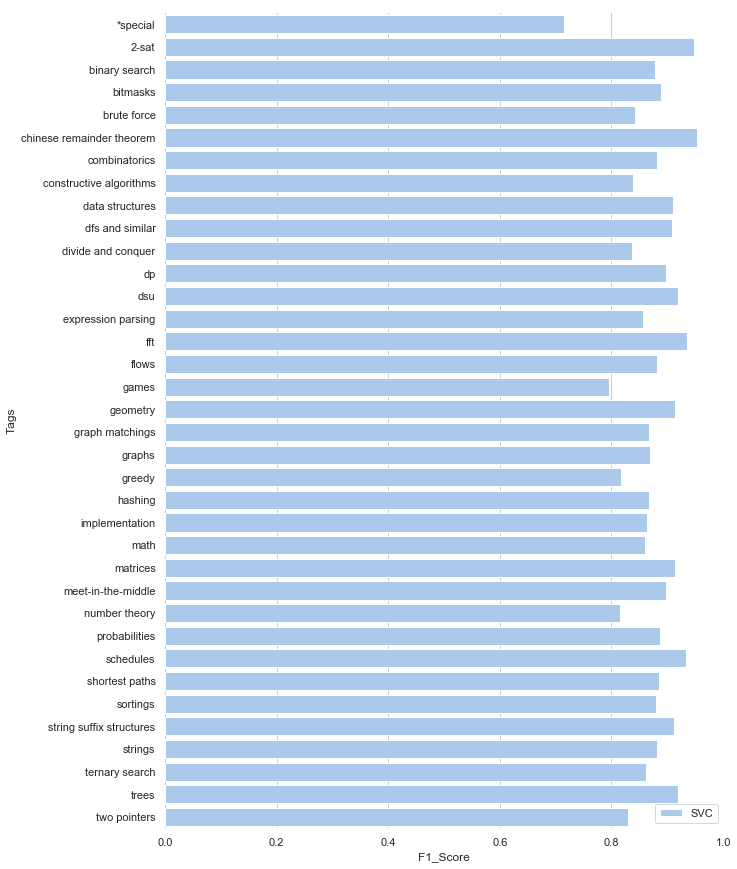

In [17]:

Visualization_Individual(SVC_classes_tags,list_of_linear_f1_score,"Linear_SVC","SVC","F1_Score","Tags")

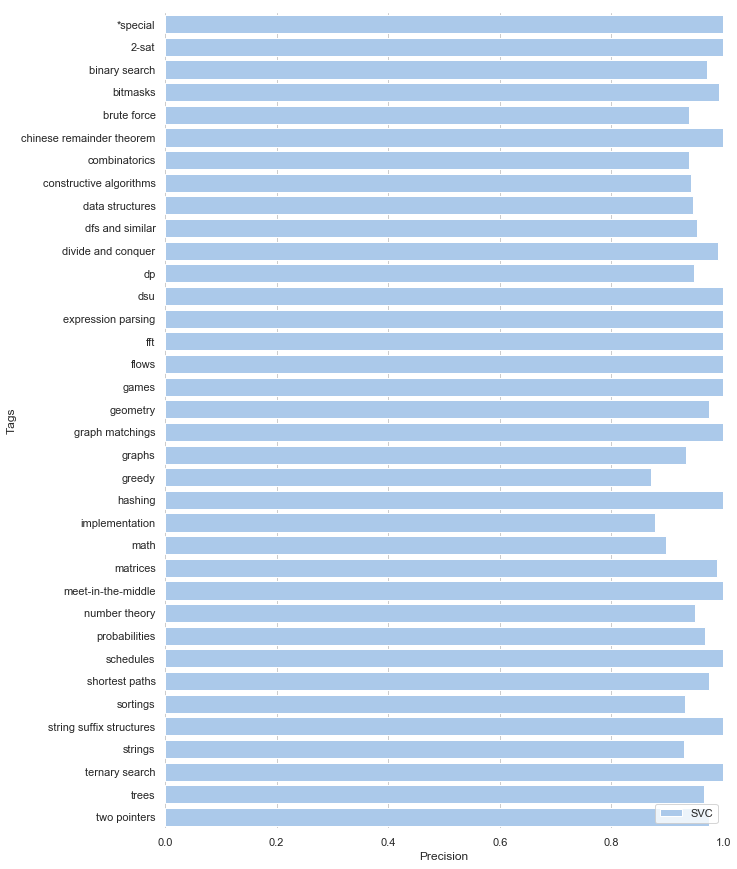

In [18]:

Visualization_Individual(SVC_classes_tags,list_of_linear_precision,"Linear_SVC","SVC","Precision","Tags")

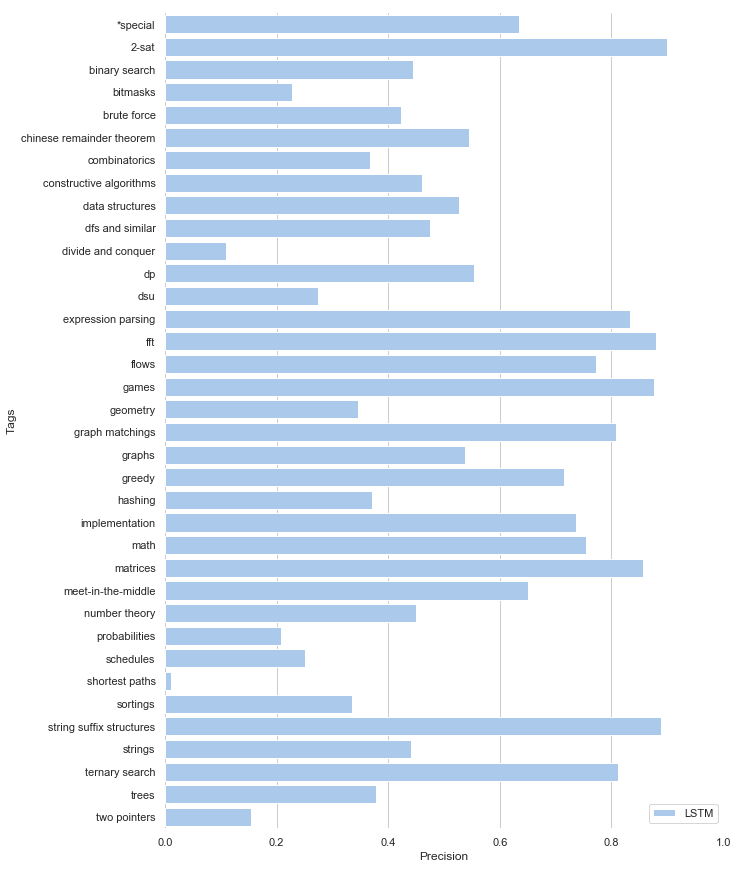

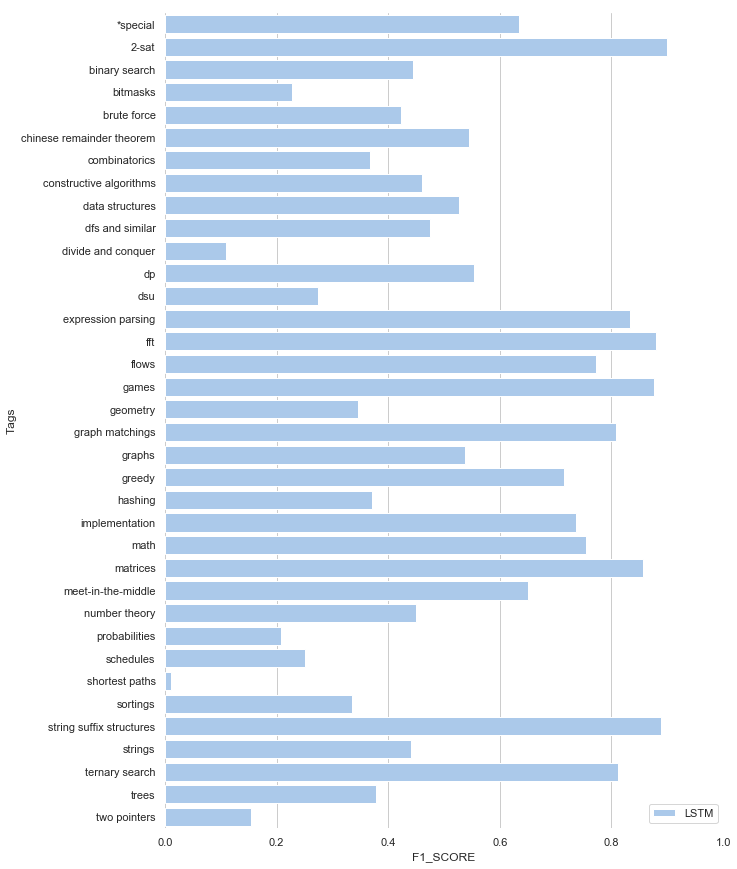

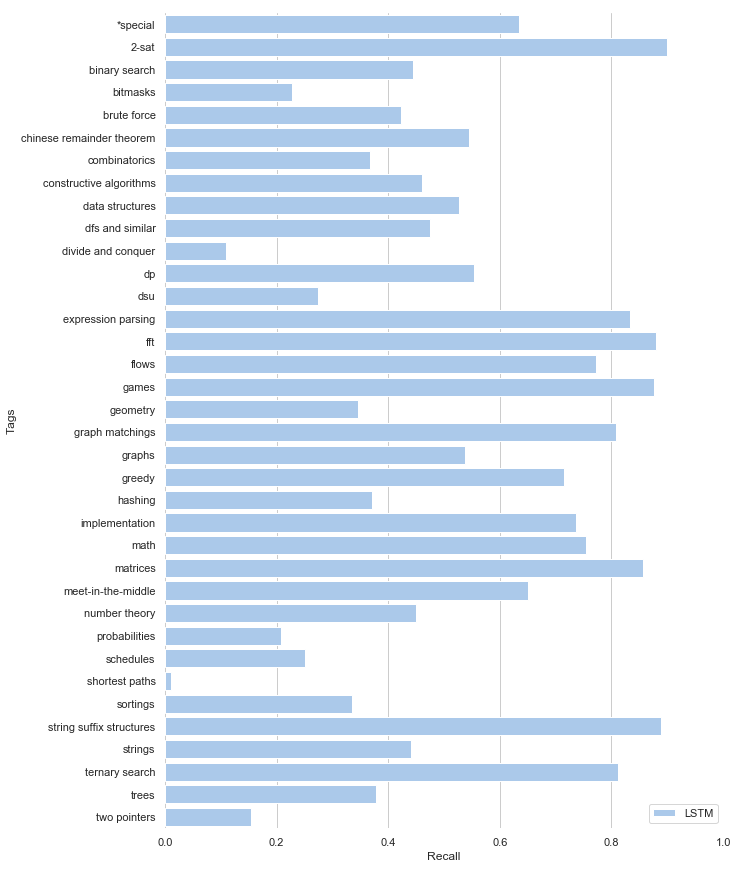

In [19]:
Visualization_Individual(LSTM_classes_tags,list_of_LSTM_precision,"LSTM","LSTM","Precision","Tags")
Visualization_Individual(LSTM_classes_tags,list_of_LSTM_f1_score,"LSTM","LSTM","F1_SCORE","Tags")
Visualization_Individual(LSTM_classes_tags,list_of_LSTM_recall,"LSTM","LSTM","Recall","Tags")

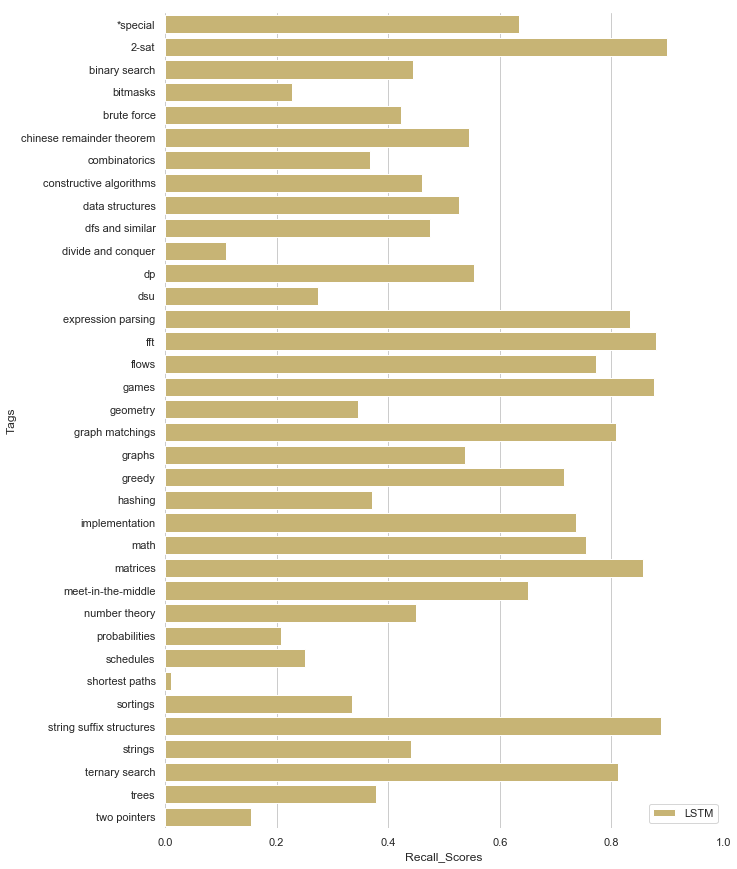

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

list_both = [list_of_linear_Recall,list_of_LSTM_recall]

crashes = pd.DataFrame({'Y_Axis':LSTM_classes_tags,
                   'Linear_SVC':list_of_linear_Recall
                   ,'LSTM':list_of_LSTM_recall
#                    ,'Algo':list_both
                  })


# # Plot the total crashes
# sns.set_color_codes("pastel")
# sns.barplot(x="Linear_SVC", y="Y_Axis", data=crashes,
#             label="SVC", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="LSTM", y="Y_Axis", data=crashes,
            label="LSTM", color="y")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Tags",
       xlabel="Recall_Scores")
sns.despine(left=True, bottom=True)

In [21]:
import numpy as np

lang = LSTM_classes_tags
use  = list_of_LSTM_recall #create a list from the second dimension of data (2018 popularity)
use2  = list_of_linear_Recall #create a list from the second dimension of data (2017 popularity)

def Visualization(lang,use,use2,title1,title2,type_name):
    ind = np.arange(len(lang)) 
    vvv = ind * 2
    width=0.4


    sns.set(rc={'figure.figsize':(16.5,17.5)})
#     sns.set(rc={'figure.figsize':(15,20)})

    # a4_dims = (11.7, 8.27)
    ax = plt.subplot(111)
    # ax = plt.subplot(figsize=a4_dims)

    ax.barh(ind, use, width, align='center', alpha=0.8, color='r', label='LSTM') #a horizontal bar chart (use .bar instead of .barh for vertical)
    ax.barh(ind - width, use2, width, align='center', alpha=0.8, color='b', label='LinearSVC') #a horizontal bar chart (use .bar instead of .barh for vertical)
    ax.set(yticks=ind + 1, yticklabels=lang, ylim=[2*width , len(lang)])
    plt.xlabel('Percentage')
    plt.title(type_name+' Comparison')
    # plt.resize(ind*2, ind*2)38

    # plt.figure(figsize=(120, 20))
    plt.ylim(0.2,35) #for y axis
    plt.legend()
    plt.show()
    


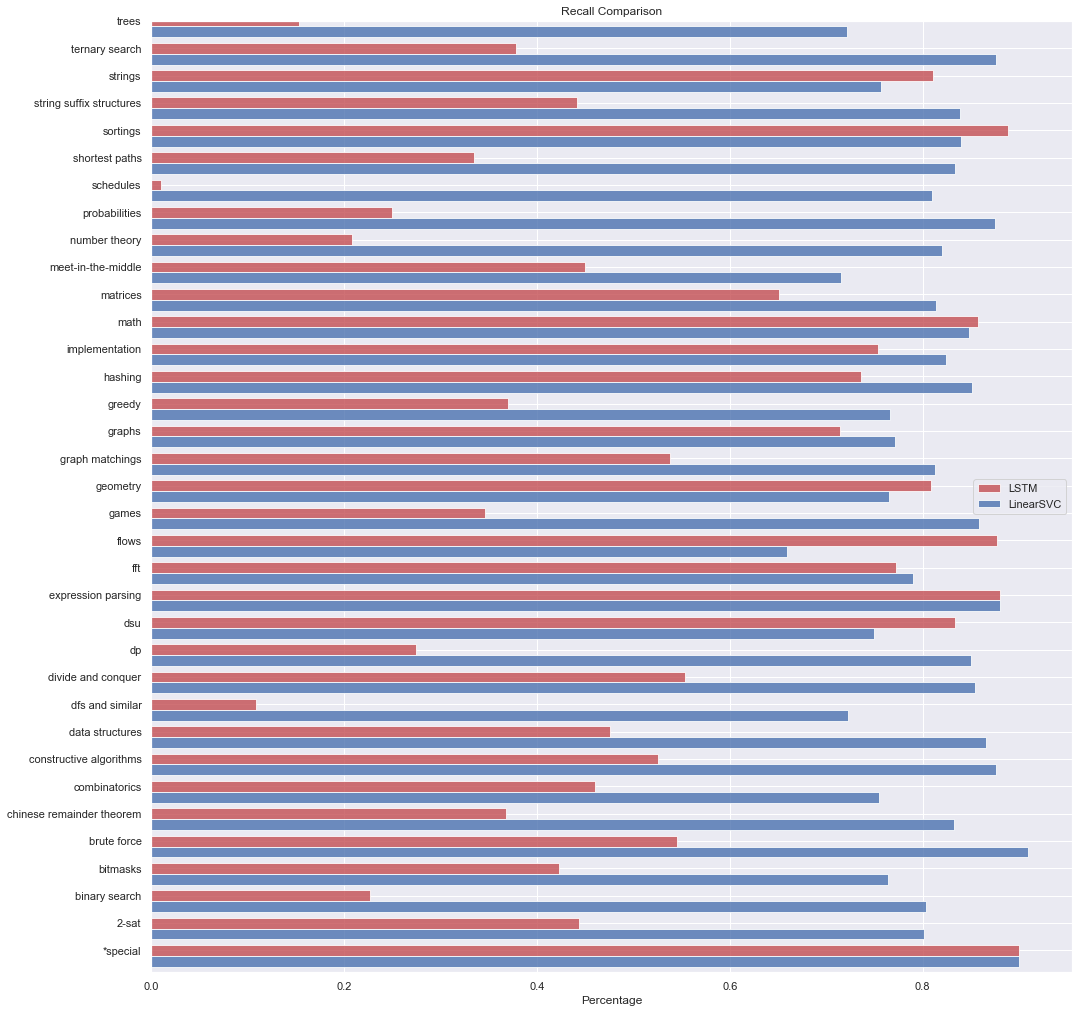

In [22]:
Visualization(LSTM_classes_tags,list_of_LSTM_recall,list_of_linear_Recall,'LSTM','LinearSVC','Recall')

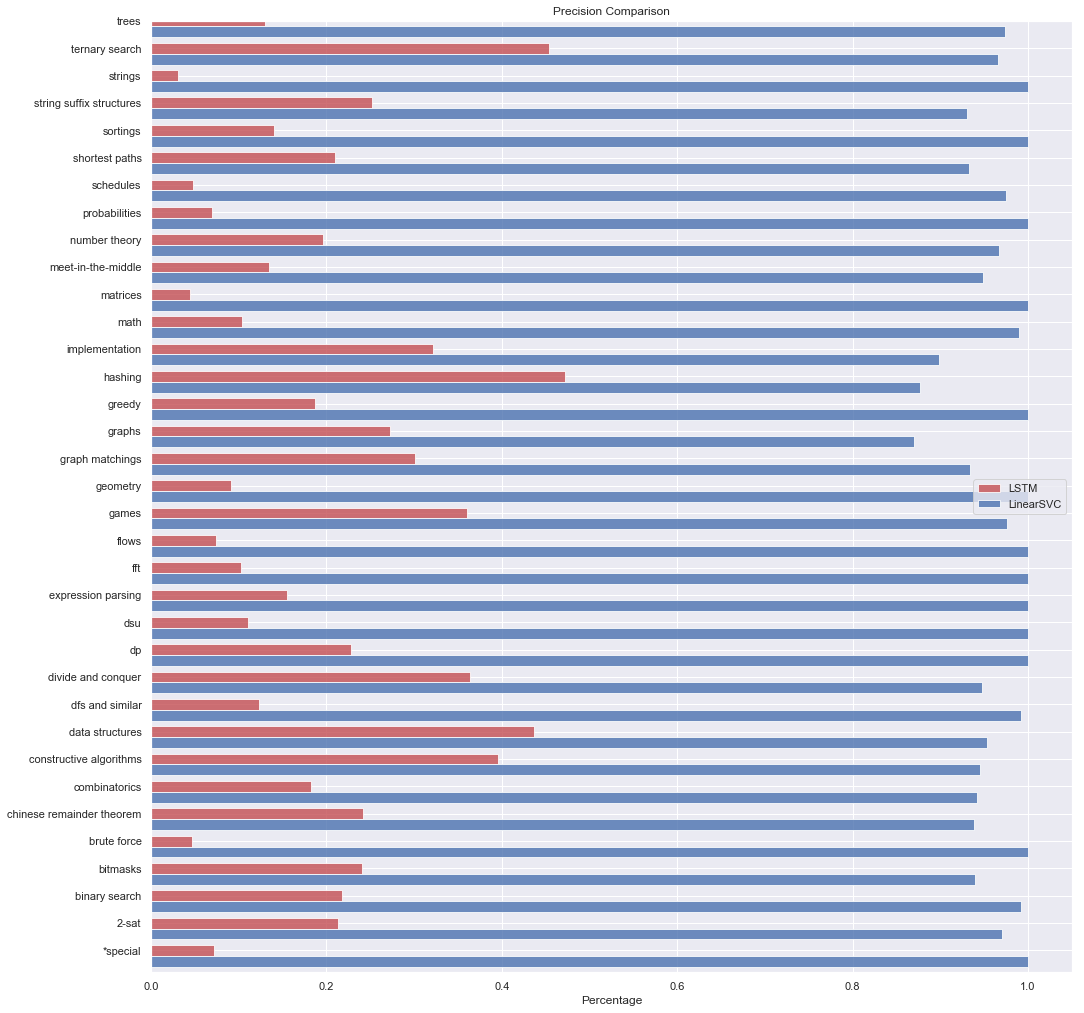

In [23]:
Visualization(LSTM_classes_tags,list_of_LSTM_precision,list_of_linear_precision,'LSTM','LinearSVC','Precision')

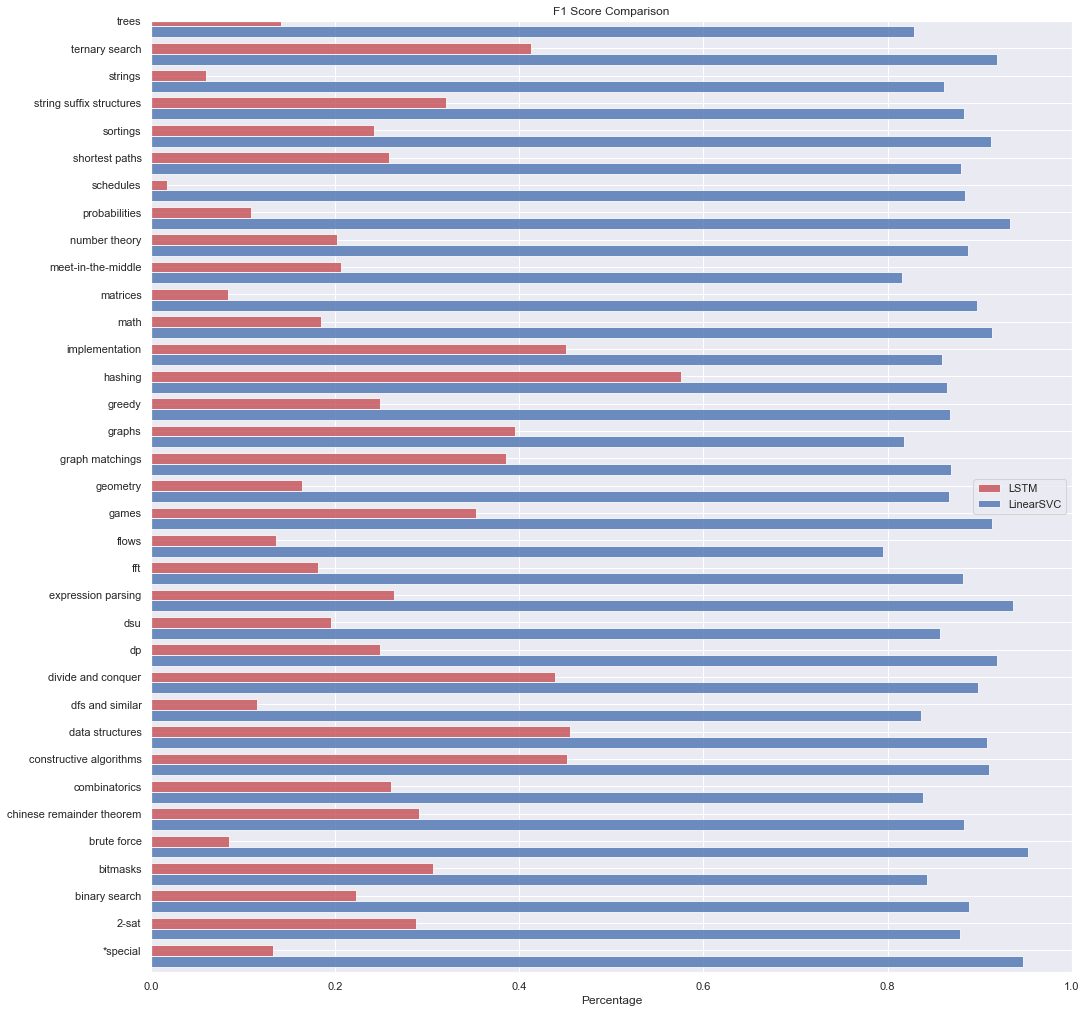

In [24]:
Visualization(LSTM_classes_tags,list_of_LSTM_f1_score,list_of_linear_f1_score,'LSTM','LinearSVC','F1 Score')

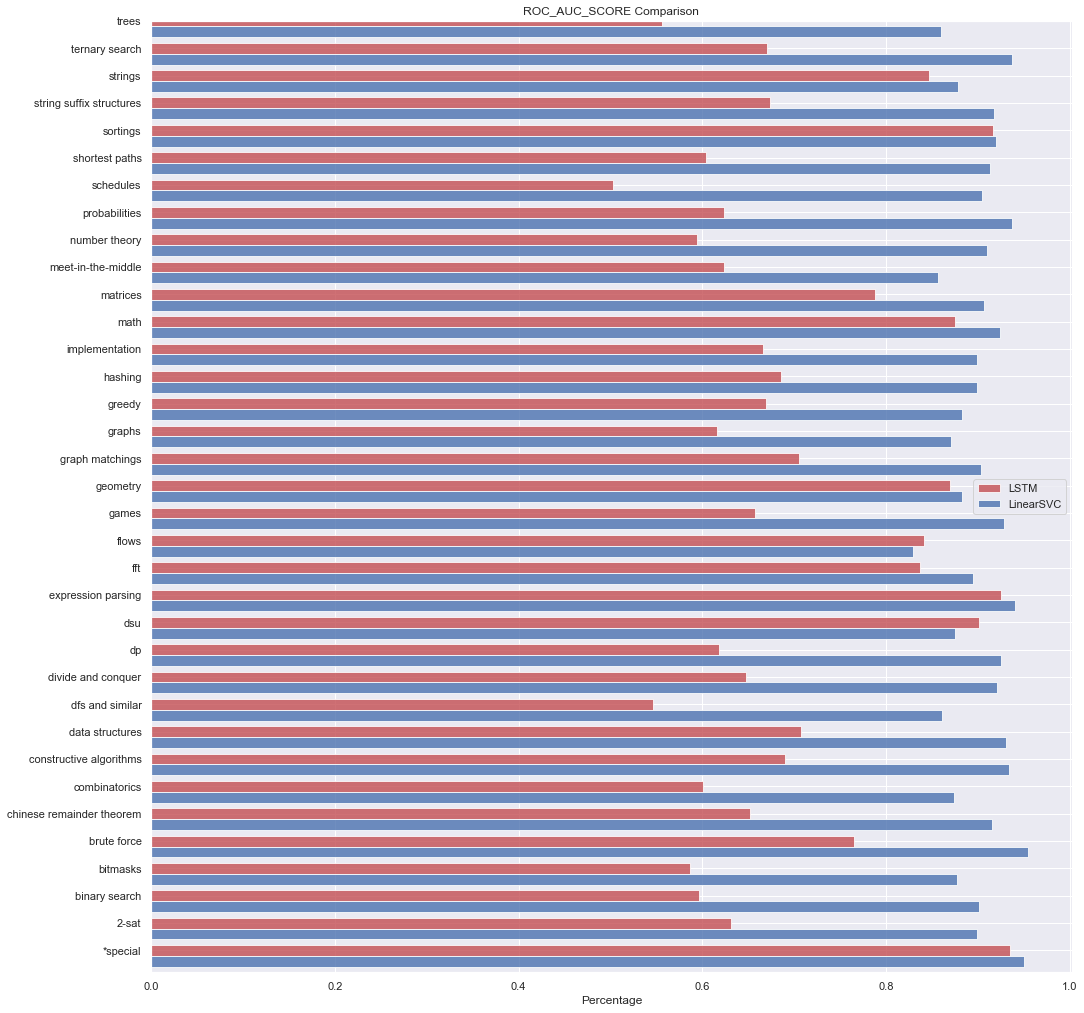

In [26]:
Visualization(LSTM_classes_tags,list_of_LSTM_roc_auc,list_of_linear_roc_auc,'LSTM','LinearSVC','ROC_AUC_SCORE')

In [25]:
# list_of_LSTM_roc_auc
# list_of_linear_roc_auc